In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import os,errno
import sys
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import pandas as pd
import datetime as dt
from scipy.ndimage.measurements import label
from math import sin, cos, sqrt, atan2, radians
import scipy.stats as st
import geopy.distance
%matplotlib inline

dir2='/thorncroftlab_rit/ahenny/rain/'
dir1='/thorncroftlab_rit/ahenny/rain/US/ghcnd_all/'
dir='/thorncroftlab_rit/ahenny/rain/DISSERTATION_SCRIPTS_RESULTS/'

In [ ]:
season='fall'
thresh_choose=99
area_threshold_choose=80
season_choose=season

ds=xr.open_dataset(dir+'extreme_days_ghcnd_'+str(thresh_choose)+'_'+str(area_threshold_choose)+'_'+season_choose+'.nc')

lats=ds['lats'].values.tolist()
lons=ds['lons'].values.tolist()
lons=[x+360. for x in lons]
dates=ds['dates'].values
dates_unique=list(set(dates))
dates_unique=pd.DatetimeIndex(dates_unique).sort_values()
stations=ds['stations'].values.tolist()
obs=ds['obs'].values.tolist()
years=[x.year for x in dates_unique]
print(years)
yrs_neusa=np.arange(1979,2020,1)

ds4=xr.open_dataset(dir+'neusa_ep_days_stats_seasonal_ep_days_'+season+'.nc')

ar_yesno4=ds4['ar_yesno'].values.tolist()
ivt_yesno4=ds4['ivt_yesno'].values.tolist()
tc_yesno4=ds4['tc_yesno'].values.tolist()
other_yesno4=ds4['other_yesno'].values.tolist()
tc_linked_ar_yesno4=ds4['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno4=ds4['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno4=ds4['tc_remnant_linked_ivt_yesno'].values.tolist()
tc_remnant_ar_combo_yesno4=ds4['tc_remnant_ar_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno4=ds4['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno4=ds4['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno4=ds4['tc_ar_combo_yesno'].values.tolist()

ds1=xr.open_dataset(dir+'station_numbers_95.nc')
lats1=ds1['lats']#use these lists for plotting
lons1=ds1['lons']
stations1=ds1['stations']

thresholds_winter_95=ds1['thresholds_winter_95']/10.
thresholds_spring_95=ds1['thresholds_spring_95']/10.
thresholds_summer_95=ds1['thresholds_summer_95']/10.
thresholds_fall_95=ds1['thresholds_fall_95']/10.

thresholds_winter_99=ds1['thresholds_winter_99']/10.
thresholds_spring_99=ds1['thresholds_spring_99']/10.
thresholds_summer_99=ds1['thresholds_summer_99']/10.
thresholds_fall_99=ds1['thresholds_fall_99']/10.

print(stations)

In [ ]:
zipped_t1=list(zip(dates_unique,ar_yesno4))#ar-related = green
zipped_t2=list(zip(dates_unique,tc_linked_ar_yesno4))
zipped_t3=list(zip(dates_unique,tc_remnant_linked_ar_yesno4))
zipped_t4=list(zip(dates_unique,tc_yesno4))#tc-related = blue
zipped_t5=list(zip(dates_unique,tc_ar_combo_yesno4))
zipped_t6=list(zip(dates_unique,tc_remnant_ar_combo_yesno4))
zipped_t7=list(zip(dates_unique,tc_remnants_yesno4))
zipped_t8=list(zip(dates_unique,ivt_yesno4))#other IVT-related = grey
zipped_t9=list(zip(dates_unique,tc_linked_ivt_yesno4))
zipped_t10=list(zip(dates_unique,tc_remnant_linked_ivt_yesno4))
zipped_t11=list(zip(dates_unique,other_yesno4))#unspecified = brown

dates_t1=[x[0] for x in zipped_t1 if x[1]==1]
dates_t2=[x[0] for x in zipped_t2 if x[1]==1]
dates_t3=[x[0] for x in zipped_t3 if x[1]==1]
dates_t4=[x[0] for x in zipped_t4 if x[1]==1]
dates_t5=[x[0] for x in zipped_t5 if x[1]==1]
dates_t6=[x[0] for x in zipped_t6 if x[1]==1]
dates_t7=[x[0] for x in zipped_t7 if x[1]==1]
dates_t8=[x[0] for x in zipped_t8 if x[1]==1]
dates_t9=[x[0] for x in zipped_t9 if x[1]==1]
dates_t10=[x[0] for x in zipped_t10 if x[1]==1]
dates_t11=[x[0] for x in zipped_t11 if x[1]==1]

dates_ar=dates_t1+dates_t2+dates_t3
dates_tc=dates_t4+dates_t5+dates_t6+dates_t7
dates_other=dates_t8+dates_t9+dates_t10+dates_t11
print(dates_ar)

if 1==0:#first half vs second half
    dates_t1=[x for x in dates_t1 if x.year>1999]
    print(dates_t1)

In [ ]:
print(stations1)

In [ ]:
zipped=list(zip(dates,stations,lats,lons,obs))

trends_list=[]
sigs_list=[]
mean_obs_list_t1=[]
mean_obs_list_t2=[]
mean_obs_list_t3=[]
mean_obs_list_t4=[]
mean_obs_list_t5=[]
mean_obs_list_t6=[]
mean_obs_list_t7=[]
mean_obs_list_t8=[]
mean_obs_list_t9=[]
mean_obs_list_t10=[]
mean_obs_list_t11=[]

mean_obs_list_tc=[]
mean_obs_list_ar=[]
mean_obs_list_other=[]
for i in range(len(stations1)):
    print(i)
    station=stations1[i].values
    select_station_t1=[x for x in zipped if x[1]==station and x[0] in dates_t1]
    select_station_t2=[x for x in zipped if x[1]==station and x[0] in dates_t2]
    select_station_t3=[x for x in zipped if x[1]==station and x[0] in dates_t3]
    select_station_t4=[x for x in zipped if x[1]==station and x[0] in dates_t4]
    select_station_t5=[x for x in zipped if x[1]==station and x[0] in dates_t5]
    select_station_t6=[x for x in zipped if x[1]==station and x[0] in dates_t6]
    select_station_t7=[x for x in zipped if x[1]==station and x[0] in dates_t7]
    select_station_t8=[x for x in zipped if x[1]==station and x[0] in dates_t8]
    select_station_t9=[x for x in zipped if x[1]==station and x[0] in dates_t9]
    select_station_t10=[x for x in zipped if x[1]==station and x[0] in dates_t10]
    select_station_t11=[x for x in zipped if x[1]==station and x[0] in dates_t11]
    
    select_station_tc=[x for x in zipped if x[1]==station and x[0] in dates_tc]
    select_station_ar=[x for x in zipped if x[1]==station and x[0] in dates_ar]
    select_station_other=[x for x in zipped if x[1]==station and x[0] in dates_other]
    
    obs_station_t1=[x[4] for x in select_station_t1]
    obs_station_t2=[x[4] for x in select_station_t2]
    obs_station_t3=[x[4] for x in select_station_t3]
    obs_station_t4=[x[4] for x in select_station_t4]
    obs_station_t5=[x[4] for x in select_station_t5]
    obs_station_t6=[x[4] for x in select_station_t6]
    obs_station_t7=[x[4] for x in select_station_t7]
    obs_station_t8=[x[4] for x in select_station_t8]
    obs_station_t9=[x[4] for x in select_station_t9]
    obs_station_t10=[x[4] for x in select_station_t10]
    obs_station_t11=[x[4] for x in select_station_t11]
    
    obs_station_tc=[x[4] for x in select_station_tc]
    obs_station_ar=[x[4] for x in select_station_ar]
    obs_station_other=[x[4] for x in select_station_other]
    
    if len(obs_station_t1)>0:
        mean_obs_station_t1=float(sum(obs_station_t1))/float(len(obs_station_t1))
    else:
        mean_obs_station_t1=0
    if len(obs_station_t2)>0:
        mean_obs_station_t2=float(sum(obs_station_t2))/float(len(obs_station_t2))
    else:
        mean_obs_station_t2=0
    if len(obs_station_t3)>0:
        mean_obs_station_t3=float(sum(obs_station_t3))/float(len(obs_station_t3))
    else:
        mean_obs_station_t3=0
    if len(obs_station_t4)>0:
        mean_obs_station_t4=float(sum(obs_station_t4))/float(len(obs_station_t4))
    else:
        mean_obs_station_t4=0
    if len(obs_station_t5)>0:
        mean_obs_station_t5=float(sum(obs_station_t5))/float(len(obs_station_t5))
    else:
        mean_obs_station_t5=0
    if len(obs_station_t6)>0:
        mean_obs_station_t6=float(sum(obs_station_t6))/float(len(obs_station_t6))
    else:
        mean_obs_station_t6=0
    if len(obs_station_t7)>0:
        mean_obs_station_t7=float(sum(obs_station_t7))/float(len(obs_station_t7))
    else:
        mean_obs_station_t7=0
    if len(obs_station_t8)>0:
        mean_obs_station_t8=float(sum(obs_station_t8))/float(len(obs_station_t8))
    else:
        mean_obs_station_t8=0
    if len(obs_station_t9)>0:
        mean_obs_station_t9=float(sum(obs_station_t9))/float(len(obs_station_t9))
    else:
        mean_obs_station_t9=0
    if len(obs_station_t10)>0:
        mean_obs_station_t10=float(sum(obs_station_t10))/float(len(obs_station_t10))
    else:
        mean_obs_station_t10=0
    if len(obs_station_t11)>0:
        mean_obs_station_t11=float(sum(obs_station_t11))/float(len(obs_station_t11))
    else:
        mean_obs_station_t11=0
        
    if len(obs_station_tc)>0:
        mean_obs_station_tc=float(sum(obs_station_tc))/float(len(obs_station_tc))
    else:
        mean_obs_station_tc=0
    mean_obs_station_ar=float(sum(obs_station_ar))/float(len(obs_station_ar))
    mean_obs_station_other=float(sum(obs_station_other))/float(len(obs_station_other))
    
    mean_obs_list_t1.append(mean_obs_station_t1)
    mean_obs_list_t2.append(mean_obs_station_t2)
    mean_obs_list_t3.append(mean_obs_station_t3)
    mean_obs_list_t4.append(mean_obs_station_t4)
    mean_obs_list_t5.append(mean_obs_station_t5)
    mean_obs_list_t6.append(mean_obs_station_t6)
    mean_obs_list_t7.append(mean_obs_station_t7)
    mean_obs_list_t8.append(mean_obs_station_t8)
    mean_obs_list_t9.append(mean_obs_station_t9)
    mean_obs_list_t10.append(mean_obs_station_t10)
    mean_obs_list_t11.append(mean_obs_station_t11)
    
    mean_obs_list_tc.append(mean_obs_station_tc)
    mean_obs_list_ar.append(mean_obs_station_ar)
    mean_obs_list_other.append(mean_obs_station_other)

In [6]:
#to draw grid lines on Lambert Conformal projection; 
#CREDIT ajdawson on GitHub https://gist.github.com/ajdawson/dd536f786741e987ae4e

from copy import copy
import shapely.geometry as sgeom
def find_side(ls, side):
    """
    Given a shapely LineString which is assumed to be rectangular, return the
    line corresponding to a given side of the rectangle.
    
    """
    minx, miny, maxx, maxy = ls.bounds
    points = {'left': [(minx, miny), (minx, maxy)],
              'right': [(maxx, miny), (maxx, maxy)],
              'bottom': [(minx, miny), (maxx, miny)],
              'top': [(minx, maxy), (maxx, maxy)],}
    return sgeom.LineString(points[side])


def lambert_xticks(ax, ticks):
    """Draw ticks on the bottom x-axis of a Lambert Conformal projection."""
    te = lambda xy: xy[0]
    lc = lambda t, n, b: np.vstack((np.zeros(n) + t, np.linspace(b[2], b[3], n))).T
    xticks, xticklabels = _lambert_ticks(ax, ticks, 'bottom', lc, te)
    ax.xaxis.tick_bottom()
    ax.set_xticks(xticks)
    ax.set_xticklabels([ax.xaxis.get_major_formatter()(xtick) for xtick in xticklabels])
    

def lambert_yticks(ax, ticks):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'left', lc, te)
    ax.yaxis.tick_left()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels])
def _lambert_ticks(ax, ticks, tick_location, line_constructor, tick_extractor):
    """Get the tick locations and labels for an axis of a Lambert Conformal projection."""
    outline_patch = sgeom.LineString(ax.outline_patch.get_path().vertices.tolist())
    axis = find_side(outline_patch, tick_location)
    n_steps = 30
    extent = ax.get_extent(ccrs.PlateCarree())
    _ticks = []
    for t in ticks:
        xy = line_constructor(t, n_steps, extent)
        proj_xyz = ax.projection.transform_points(ccrs.Geodetic(), xy[:, 0], xy[:, 1])
        xyt = proj_xyz[..., :2]
        ls = sgeom.LineString(xyt.tolist())
        locs = axis.intersection(ls)
        if not locs:
            tick = [None]
        else:
            tick = tick_extractor(locs.xy)
        _ticks.append(tick[0])
    # Remove ticks that aren't visible:    
    ticklabels = copy(ticks)
    while True:
        try:
            index = _ticks.index(None)
        except ValueError:
            break
        _ticks.pop(index)
        ticklabels.pop(index)
    return _ticks, ticklabels

/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.


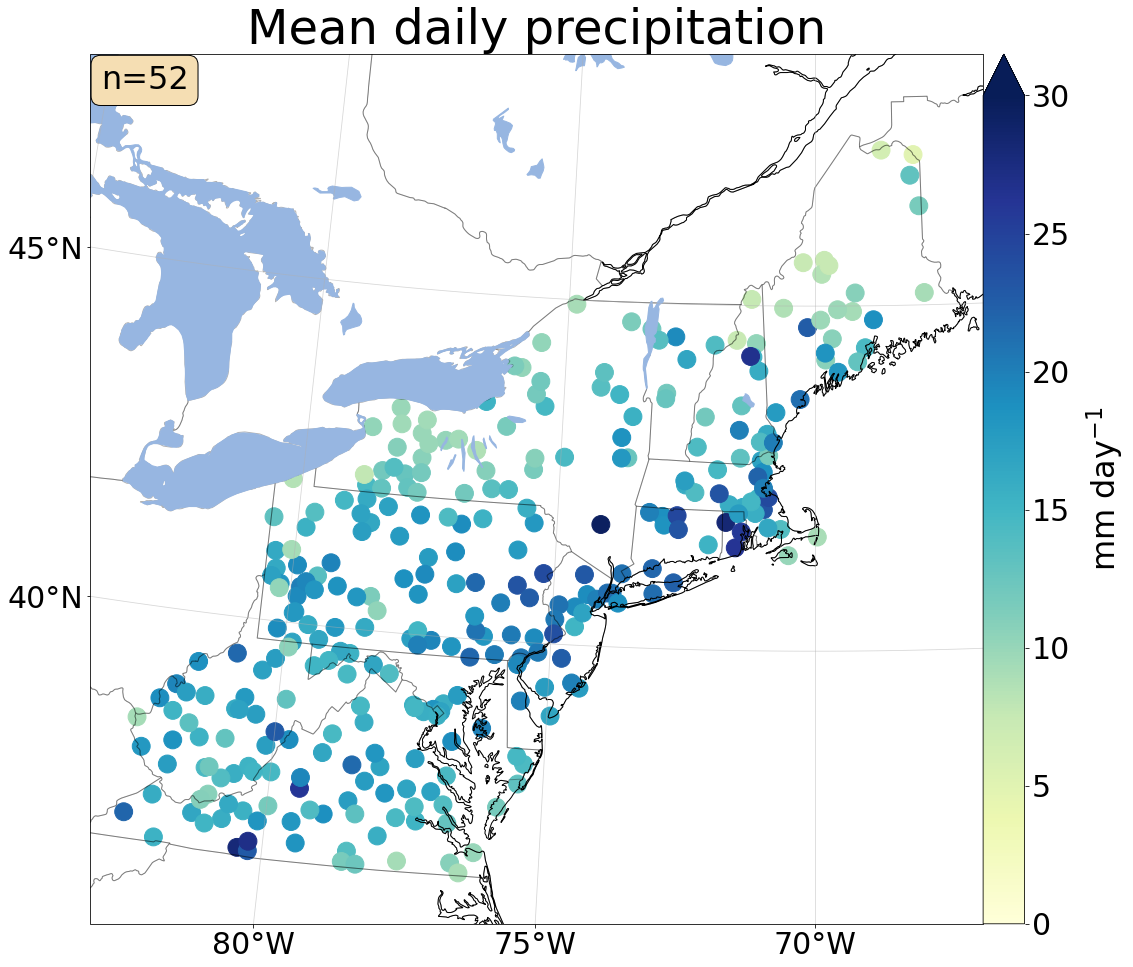

In [11]:
dates_choose=dates_t1
title='Mean daily precipitation'
obs_list=mean_obs_list_t1

clon=-70
clat=35
proj_map = ccrs.LambertConformal(central_longitude=clon, central_latitude=clat)
fig = plt.figure(figsize=(20,16))
ax=plt.subplot(1,1,1,projection=proj_map)

#zipped_t1=list(zip(dates,ar_yesno4))#ar-related = green
#zipped_t2=list(zip(dates,tc_linked_ar_yesno4))
#zipped_t3=list(zip(dates,tc_remnant_linked_ar_yesno4))
#zipped_t4=list(zip(dates,tc_yesno4))#tc-related = blue
#zipped_t5=list(zip(dates,tc_ar_combo_yesno4))
#zipped_t6=list(zip(dates,tc_remnant_ar_combo_yesno4))
#zipped_t7=list(zip(dates,tc_remnants_yesno4))
#zipped_t8=list(zip(dates,ivt_yesno4))#other IVT-related = grey
#zipped_t9=list(zip(dates,tc_linked_ivt_yesno4))
#zipped_t10=list(zip(dates,tc_remnant_linked_ivt_yesno4))
#zipped_t11=list(zip(dates,other_yesno4))#unspecified = brown

ax.coastlines(resolution='10m')
ax.add_feature(cfeature.STATES.with_scale('10m'),alpha=0.3)
ax.add_feature(cfeature.LAKES.with_scale('50m'))
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_boundary_lines_land',scale='50m',facecolor='none')
ax.add_feature(countries)
ax.set_extent([-83,-67,36,48],crs=ccrs.PlateCarree())

# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = [-90,-85,-80,-75,-70,-65,-60,-50]
yticks = [5,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
ax.gridlines(xlocs=xticks, ylocs=yticks,alpha=0.5)
ax.tick_params(labelsize=30)
# Label the end-points of the gridlines using the custom tick makers:
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)

cax=ax.scatter(lons1,lats1,s=320,c=obs_list,transform=ccrs.PlateCarree(),vmin=0,vmax=30,cmap=plt.cm.YlGnBu)
cbar=plt.colorbar(cax,pad=0,extend='max',fraction=0.046)
cbar.ax.tick_params(labelsize=30)
cbar.set_label('mm day$^{-1}$',fontsize=32,rotation=90,labelpad=15)
ax.set_title(title,fontsize=48,pad=10)
props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
ax.text(0.012, 0.9875,'n='+str(len(dates_choose)), transform=ax.transAxes, fontsize=32,verticalalignment='top', bbox=props)
plt.show()

In [12]:
fig.savefig(dir+'neusa_seasonal_precip_composites_winterhalf2.png')#1,2

In [7]:
#@author: Michael Schramm on GitHub
#This function is derived from code originally posted by Sat Kumar Tomer
#(satkumartomer@gmail.com)
#See also: http://vsp.pnnl.gov/help/Vsample/Design_Trend_Mann_Kendall.htm

from scipy.stats import norm
import scipy.stats as st
def mk_test(x, alpha=0.05):
    n = len(x)

    # calculate S
    s = 0
    for k in range(n-1):
        for j in range(k+1, n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x, tp = np.unique(x, return_counts=True)
    g = len(unique_x)

    # calculate the var(s)
    if n == g:  # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else:  # there are some ties in data
        var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s > 0:
        z = (s - 1)/np.sqrt(var_s)
    elif s < 0:
        z = (s + 1)/np.sqrt(var_s)
    else: # s == 0:
        z = 0

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z)))  # two tail test
    h = abs(z) > norm.ppf(1-alpha/2)

    if (z < 0) and h:
        trend = 'decreasing'
    elif (z > 0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z

In [ ]:
zipped_stations=list(zip(stations1,lats1,lons1,thresholds))
trends_list=[]
sigs_list=[]
sigs_list=[]
sigs_lista=[]
size_list=[]

dates_choose=dates_tc
print(dates_choose)
for i in range(len(stations1)):
    print(i)
    station=stations1[i].values
    annual_sum_list=[]
    for j in range(len(yrs_neusa)):
        year=yrs_neusa[0]+j
        #print(year)
        select_station=[x for x in zipped if x[1]==station and x[0] in dates_choose and pd.to_datetime(x[0]).year==year]
     
        if len(select_station)>0:
            select_obs=[x[4] for x in select_station]
            annual_sum=sum(select_obs)
            annual_sum_list.append(annual_sum)
        else:
            annual_sum_list.append(0)
            
    annual_sum_mean=float(sum(annual_sum_list))/float(len(annual_sum_list))
    nonzero=len([x for x in annual_sum_list if x>0])
    if nonzero>=5:
        size_list.append(1)
    else:
        size_list.append(0)
    trend=mk_test(annual_sum_list,alpha=0.05)[0]
    trenda=mk_test(annual_sum_list,alpha=0.1)[0]
    slope=st.linregress(yrs_neusa,annual_sum_list)[0]
    slope_percent=slope/annual_sum_mean*100.
    if trend=='increasing':
        sig=1
    elif trend=='decreasing':
        sig=-1
    else:
        sig=0  
    if trenda=='increasing':
        siga=1
    elif trenda=='decreasing':
        siga=-1
    else:
        siga=0
    trends_list.append(slope_percent)
    sigs_list.append(sig)
    sigs_lista.append(siga)
print(trends_list)

/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.


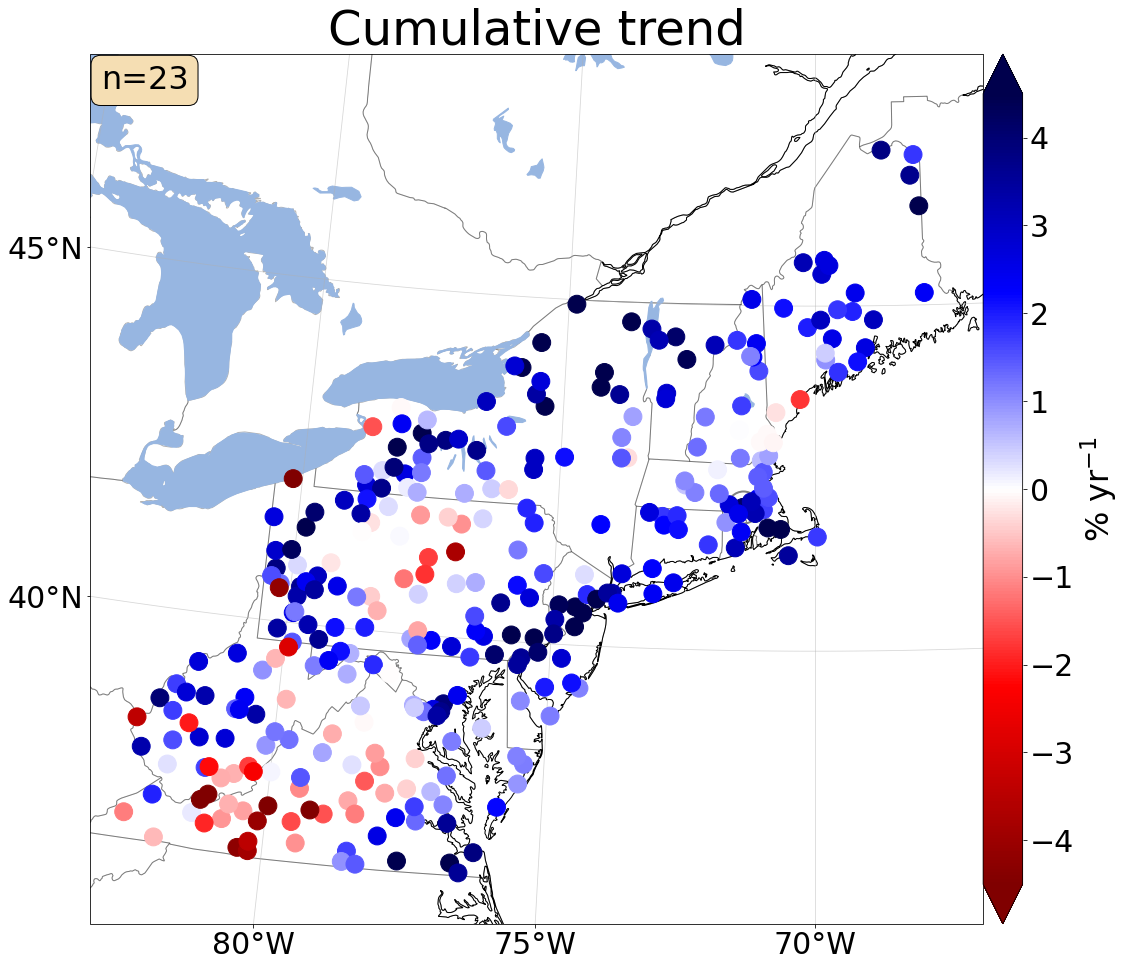

In [60]:
clon=-70
clat=35
proj_map = ccrs.LambertConformal(central_longitude=clon, central_latitude=clat)
fig = plt.figure(figsize=(20,16))
ax=plt.subplot(1,1,1,projection=proj_map)

ax.coastlines(resolution='10m')
ax.add_feature(cfeature.STATES.with_scale('10m'),alpha=0.3)
ax.add_feature(cfeature.LAKES.with_scale('50m'))
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_boundary_lines_land',scale='50m',facecolor='none')
ax.add_feature(countries)
ax.set_extent([-83,-67,36,48],crs=ccrs.PlateCarree())

sigs_list=sigs_list.copy()#no_tc_inf
sigs_lista=sigs_lista.copy()
trends_list=trends_list.copy()
size_list=size_list.copy()
dates_list=dates_choose.copy()

for i in range(len(sigs_list)):
    if size_list[i]==0:
        trends_list[i]=np.nan
        
for i in range(len(sigs_lista)):
    sig=sigs_lista[i]
    if sig in [-1,1] and size_list[i]==1:#convert to mm
        ax.plot(lons1[i],lats1[i],transform=ccrs.PlateCarree(),marker='o',markerfacecolor='None',markeredgecolor='grey',markeredgewidth=2,markersize=32)
    
for i in range(len(sigs_list)):
    sig=sigs_list[i]
    if sig in [-1,1] and size_list[i]==1:#convert to mm
        ax.plot(lons1[i],lats1[i],transform=ccrs.PlateCarree(),marker='o',markerfacecolor='None',markeredgecolor='k',markeredgewidth=2,markersize=32)
    
# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

#zipped_t1=list(zip(dates,ar_yesno4))#ar-related = green
#zipped_t2=list(zip(dates,tc_linked_ar_yesno4))
#zipped_t3=list(zip(dates,tc_remnant_linked_ar_yesno4))
#zipped_t4=list(zip(dates,tc_yesno4))#tc-related = blue
#zipped_t5=list(zip(dates,tc_ar_combo_yesno4))
#zipped_t6=list(zip(dates,tc_remnant_ar_combo_yesno4))
#zipped_t7=list(zip(dates,tc_remnants_yesno4))
#zipped_t8=list(zip(dates,ivt_yesno4))#other IVT-related = grey
#zipped_t9=list(zip(dates,tc_linked_ivt_yesno4))
#zipped_t10=list(zip(dates,tc_remnant_linked_ivt_yesno4))
#zipped_t11=list(zip(dates,other_yesno4))#unspecified = brown

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = [-90,-85,-80,-75,-70,-65,-60,-50]
yticks = [5,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
ax.gridlines(xlocs=xticks, ylocs=yticks,alpha=0.5)
ax.tick_params(labelsize=30)
# Label the end-points of the gridlines using the custom tick makers:
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)
cax=ax.scatter(lons1,lats1,s=320,c=trends_list,transform=ccrs.PlateCarree(),vmin=-4.5,vmax=4.5,cmap=plt.cm.seismic_r,zorder=10)
for i in range(len(trends_list)):
    lon=lons1[i]
    lat=lats1[i]
    size=size_list[i]
    if size==0:
        if trends_list[i]>0:
            print('POS')
            ax.plot(lon,lat,marker='+',markersize=8,color='k')
        if trends_list[i]<0:
            print('NEG')
            ax.plot(lon,lat,marker='_',markersize=8,color='k')
cbar=plt.colorbar(cax,pad=0,extend='both',fraction=0.046)
cbar.ax.tick_params(labelsize=30)
cbar.set_label('% yr$^{-1}$',fontsize=32,rotation=90,labelpad=5)
ax.set_title('Cumulative trend',fontsize=48,pad=10)
props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
ax.text(0.012, 0.9875,'n='+str(len(dates_list)), transform=ax.transAxes, fontsize=32,verticalalignment='top', bbox=props)
plt.show()

In [61]:
fig.savefig(dir+'neusa_seasonal_precip_composites_summer4.png')#1,2

In [ ]:
#INTENSITY TRENDS

trends_list=[]
sigs_list=[]
size_list=[]

dates_choose=dates_ar
mean_obs_choose=mean_obs_list_ar
thresholds_choose=thresholds_fall_99

zipped_stations=list(zip(stations1,lats1,lons1,thresholds_choose))

print(dates_choose)
for i in range(len(stations1)):
    print(i)
    station=stations1[i].values
    select_station=[x for x in zipped if x[1]==station and x[0] in dates_choose]
    years_list=[pd.to_datetime(x[0]).year for x in select_station]
    values_list=[x[4] for x in select_station]
    
    linregress=st.linregress(years_list,values_list)
    slope=linregress[0]
    p_value=linregress[3]
    nonzero=len([x for x in values_list if x>=0.1])#should be large for this purpose
    if nonzero>=5:
        size_list.append(1)
    else:
        size_list.append(0)
    
    slope_percent=slope/mean_obs_choose[i]*100.
    trends_list.append(slope_percent)
    sigs_list.append(p_value)

print(trends_list)

/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.


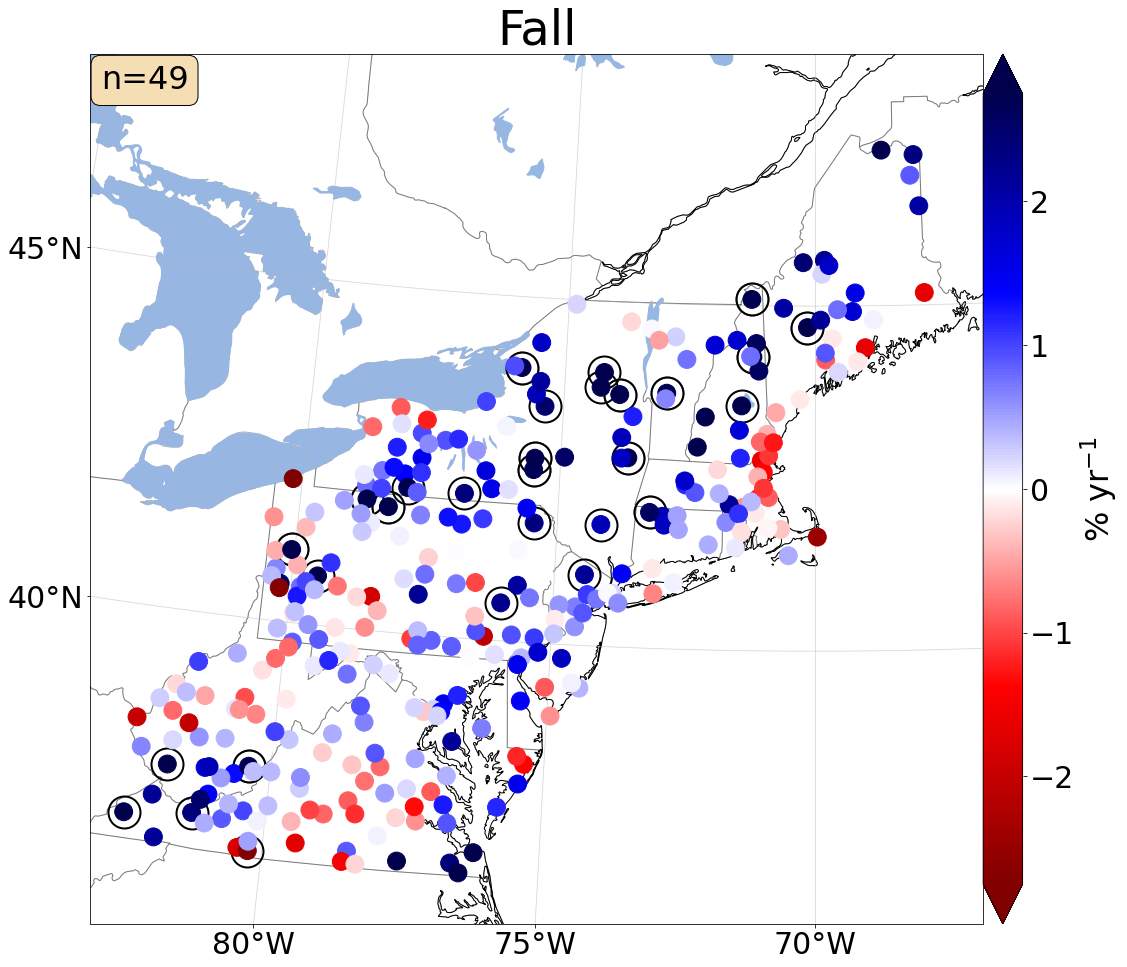

In [33]:
clon=-70
clat=35
proj_map = ccrs.LambertConformal(central_longitude=clon, central_latitude=clat)
fig = plt.figure(figsize=(20,16))
ax=plt.subplot(1,1,1,projection=proj_map)

ax.coastlines(resolution='10m')
ax.add_feature(cfeature.STATES.with_scale('10m'),alpha=0.3)
ax.add_feature(cfeature.LAKES.with_scale('50m'))
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_boundary_lines_land',scale='50m',facecolor='none')
ax.add_feature(countries)
ax.set_extent([-83,-67,36,48],crs=ccrs.PlateCarree())

sigs_list=sigs_list.copy()#no_tc_inf
trends_list=trends_list.copy()
size_list=size_list.copy()
dates_list=dates_choose.copy()

for i in range(len(sigs_list)):
    if size_list[i]==0:
        trends_list[i]=np.nan
        
for i in range(len(sigs_list)):
    sig=sigs_list[i]
    if sig<=0.05 and size_list[i]==1:#convert to mm
        ax.plot(lons1[i],lats1[i],transform=ccrs.PlateCarree(),marker='o',markerfacecolor='None',markeredgecolor='grey',markeredgewidth=2,markersize=32)
    if sig<=0.10 and size_list[i]==1:#convert to mm
        ax.plot(lons1[i],lats1[i],transform=ccrs.PlateCarree(),marker='o',markerfacecolor='None',markeredgecolor='k',markeredgewidth=2,markersize=32)

# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = [-90,-85,-80,-75,-70,-65,-60,-50]
yticks = [5,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
ax.gridlines(xlocs=xticks, ylocs=yticks,alpha=0.5)
ax.tick_params(labelsize=30)
# Label the end-points of the gridlines using the custom tick makers:
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)
cax=ax.scatter(lons1,lats1,s=320,c=trends_list,transform=ccrs.PlateCarree(),vmin=-2.75,vmax=2.75,cmap=plt.cm.seismic_r,zorder=10)
for i in range(len(trends_list)):
    lon=lons1[i]
    lat=lats1[i]
    size=size_list[i]
    if size==0:
        if trends_list[i]>0:
            print('POS')
            ax.plot(lon,lat,marker='+',markersize=8,color='k')
        if trends_list[i]<0:
            print('NEG')
            ax.plot(lon,lat,marker='_',markersize=8,color='k')
cbar=plt.colorbar(cax,pad=0,extend='both',fraction=0.046)
cbar.ax.tick_params(labelsize=30)
cbar.set_label('% yr$^{-1}$',fontsize=32,rotation=90,labelpad=5)
ax.set_title('Fall',fontsize=48,pad=10)
props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
ax.text(0.012, 0.9875,'n='+str(len(dates_list)), transform=ax.transAxes, fontsize=32,verticalalignment='top', bbox=props)
plt.show()

In [34]:
fig.savefig(dir+'neusa_seasonal_intensity_composites_seasons4.png')#1,2